In [263]:
# Importing modules
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [226]:
# Load the data
df = pd.read_csv('AviationData.csv', encoding='cp1252')
df.head()

c:\Users\navil\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [227]:
# Check for duplicated rows
df.duplicated().sum()

0

In [228]:
# Check missing values
missing_series = df.isna().sum() / len(df)

# Sort
missing_series.sort_values(ascending=False, inplace=True)
missing_series

Schedule                  0.858453
Air.carrier               0.812710
FAR.Description           0.639742
Aircraft.Category         0.636772
Longitude                 0.613304
Latitude                  0.613203
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number     

In [229]:
# Drop columns with many missing values that are not relevant
columns_to_drop = ['Schedule', 'Air.carrier', 'FAR.Description', 'Longitude', 'Latitude']

df.drop(columns_to_drop, axis=1, inplace=True)

In [230]:
df.isna().sum().sort_values(ascending=False) / len(df)

Aircraft.Category         0.636772
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number           0.000000
Investigation.Type        0.000000
Event.Id                  0.000000
dtype: float64

In [231]:
# Inspect Aircraft.Category
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Aircraft.Category       32287 non-null  object 
 11  Registration.Number     87572 non-null  object 
 12  Make                    88826 non-null  object 
 13  Model                   88797 non-null  object 
 14  Amateur.Built           88787 non-null

In [233]:
# Drop rows missing model or make
df.dropna(subset=['Make', 'Model'], inplace=True)
df[['Make', 'Model']].isna().sum()

Make     0
Model    0
dtype: int64

In [234]:
# Rearrange row index
df.reset_index(drop=True, inplace=True)

In [235]:
# Check amateuer built column
df['Amateur.Built'].mode()

0    No
dtype: object

In [236]:
# fill the column with the mode
df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0], inplace=True)
df['Amateur.Built'].isna().sum()

0

In [237]:
# check the damage column
df['Aircraft.damage'].value_counts()

Substantial    64097
Destroyed      18597
Minor           2792
Unknown          119
Name: Aircraft.damage, dtype: int64

In [238]:
# Imputing with mean
df['Total.Fatal.Injuries'].fillna(np.floor(df['Total.Fatal.Injuries'].mean()), inplace=True)
df['Total.Minor.Injuries'].fillna(np.floor(df['Total.Minor.Injuries'].mean()), inplace=True)
df['Total.Serious.Injuries'].fillna(np.floor(df['Total.Serious.Injuries'].mean()), inplace=True)
df['Total.Uninjured'].fillna(np.floor(df['Total.Uninjured'].mean()), inplace=True)

In [239]:
# impute number of engines column with mean
df['Number.of.Engines'].fillna(np.floor(df['Number.of.Engines'].mean()), inplace=True)

In [240]:
# fill other missing values with 'missing'
df.fillna('missing', inplace=True)

In [241]:
# Confirm no missing values
df.isna().sum().sum()

0

In [421]:
# Create new file of cleaned data
df.to_csv('AviationDataCleaned.csv')

In [353]:
# Filter to get only Airplanes
df = df[df['Aircraft.Category'] == 'Airplane']

In [354]:
# inspect the severity column
df[['Injury.Severity', 'Total.Fatal.Injuries']] 

,Injury.Severity,Total.Fatal.Injuries
5,Non-Fatal,0.0
7,Non-Fatal,0.0
8,Non-Fatal,0.0
12,Non-Fatal,0.0
13,Fatal,1.0
...,...,...
88757,Non-Fatal,0.0
88761,Non-Fatal,0.0
88764,Non-Fatal,0.0
88765,Minor,0.0


In [355]:
# More cleaning in injury severity column - dont include no of fatal injuries
df['Injury.Severity'] = df['Injury.Severity'].map(
    lambda x: 'Fatal' if 'Fatal(' in x else x
)

<ipython-input-355-3672e19f44f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Injury.Severity'] = df['Injury.Severity'].map(


In [356]:
# Check available categories
df['Injury.Severity'].value_counts()

Non-Fatal      21041
Fatal           5171
missing          812
Incident         244
Minor            165
Serious          127
Unavailable       20
Name: Injury.Severity, dtype: int64

In [357]:
# Create Unique name field
df['Unique_name'] = df['Make'] + '_' + df['Model']

<ipython-input-357-88245d492a97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unique_name'] = df['Make'] + '_' + df['Model']


In [358]:
# Change to datetime dtype
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

<ipython-input-358-5cfa7e72fef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event.Date'] = pd.to_datetime(df['Event.Date'])


In [359]:
# create new column for year
df['year'] = df['Event.Date'].map(lambda x: x.year)

<ipython-input-359-5b887951bac5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Event.Date'].map(lambda x: x.year)


In [360]:
# Group by investigation type to get count of accidents for each model
accidents_series = df[df['Investigation.Type'] == 'Accident'].groupby(
    ['Unique_name']
)['Investigation.Type'].count()

# create df for incident and accident count
accident_incident_df = df['Unique_name']
accident_incident_df

5                   Mcdonnell Douglas_DC9
7                              Cessna_140
8                             Cessna_401B
12                        Bellanca_17-30A
13                           Cessna_R172K
                       ...               
88757                          PIPER_PA42
88761             CIRRUS DESIGN CORP_SR22
88764                  SWEARINGEN_SA226TC
88765                        CESSNA_R172K
88774    AMERICAN CHAMPION AIRCRAFT_8GCBC
Name: Unique_name, Length: 27580, dtype: object

In [361]:
# Drop duplicates to ensure unique aircraft name
accident_incident_df.drop_duplicates(inplace=True)
accident_incident_df = accident_incident_df.reset_index()
accident_incident_df.duplicated().sum()

<ipython-input-361-61710b246c39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_incident_df.drop_duplicates(inplace=True)


0

In [362]:
# Create accident_count column
accident_incident_df['accident_count'] = accident_incident_df['Unique_name']
accident_incident_df.drop('index', axis=1, inplace=True)

In [363]:
# Run above cells
# map the real accident count values to the column
accident_incident_df['accident_count'] = accident_incident_df['accident_count'].map(
    lambda x: accidents_series[x] if x in accidents_series.index else 0
)

accident_incident_df['accident_count']

0        1
1       53
2        1
3       12
4       11
        ..
8515     1
8516     1
8517     1
8518     1
8519     1
Name: accident_count, Length: 8520, dtype: int64

In [364]:
# Group by investigation type to get count of incidents for each aircraft
incidents_series = df[df['Investigation.Type'] == 'Incident'].groupby(
    ['Unique_name']
)['Investigation.Type'].count()
incidents_series.head()

Unique_name
2007 Savage Air LLC_EPIC LT    1
737_800                        2
777_FF2                        1
AIR TRACTOR INC_AT 402A        1
AIR TRACTOR INC_AT-502         1
Name: Investigation.Type, dtype: int64

In [365]:
# Run above cells
# Add column for incident count - the number of incidents per aircraft
accident_incident_df['incident_count'] = accident_incident_df['Unique_name']
accident_incident_df['incident_count'] = accident_incident_df['incident_count'].map(
    lambda x: incidents_series[x] if x in incidents_series.index else 0,
)

In [366]:
# Create new column for total accidents and incidents
accident_incident_df['total_accidents_incidents'] = (
    accident_incident_df['accident_count'] + accident_incident_df['incident_count']
)
accident_incident_df.sort_values('total_accidents_incidents', ascending=False, inplace=True)
accident_incident_df.head()

,Unique_name,accident_count,incident_count,total_accidents_incidents
2251,CESSNA_172,488,5,493
8,Cessna_172,373,1,374
2190,BOEING_737,100,268,368
9,Cessna_152,253,4,257
2181,CESSNA_152,188,5,193


Text(0.5, 1.0, 'Top 5o Riskiest Aircrafts')

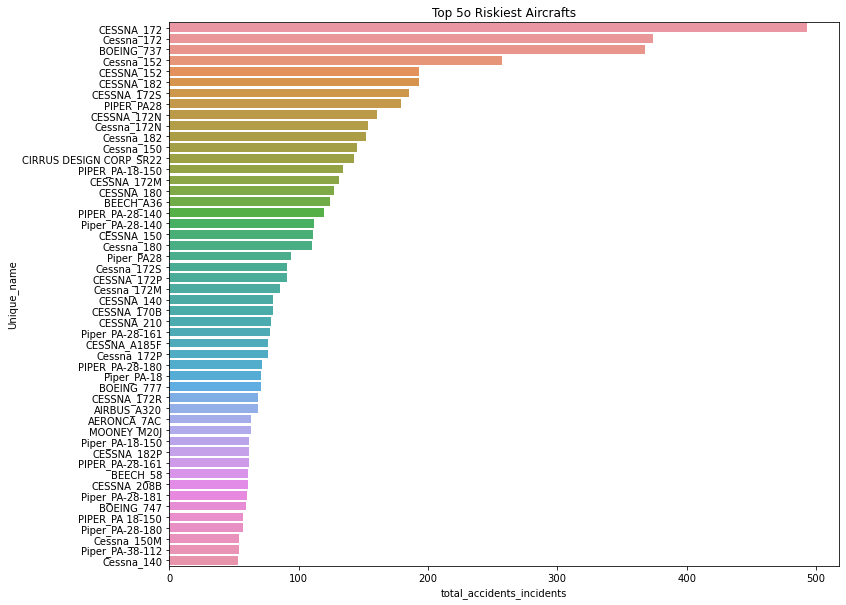

In [367]:
# plot top riskiest aircrafts
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=accident_incident_df.head(50),
            y='Unique_name',
            x='total_accidents_incidents',
            orient='h',
            ax=ax)
plt.title('Top 5o Riskiest Aircrafts')


In [368]:
# Get aircrafts with lowest incidents and no accidents
lowest_accidents_incidents = accident_incident_df[
    (accident_incident_df['accident_count'] == 0) &
    (
        accident_incident_df['total_accidents_incidents'] ==
        accident_incident_df['total_accidents_incidents'].min()
    )
]

lowest_accidents_incidents.set_index('Unique_name', inplace=True)
lowest_accidents_incidents

,accident_count,incident_count,total_accidents_incidents
Unique_name,,,
BOEING_747 - 409LCF,0,1,1
BAE_Jetstream,0,1,1
BAE SYSTEMS (OPERATIONS) LIMIT_AVRO 146-RJ85,0,1,1
Fairchild Industries_SA226-TC,0,1,1
SAAB_SAAB 2000,0,1,1
...,...,...,...
BOMBARDIER_CL600,0,1,1
AIRBUS_A300-600R,0,1,1
AIRBUS_A319-111,0,1,1


In [369]:
# What does unavailable mean
df[df['Injury.Severity'] == 'Unavailable'].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Unique_name,year
41627,20001208X07697,Accident,DCA97WA043,1997-04-27,"JINAN, CHINA",China,missing,missing,Unavailable,Substantial,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Mcdonnell Douglas_MD-82,1997
42258,20001208X08352,Accident,DCA97WA054,1997-07-21,"SOUTHERN THAILA, Thailand",Thailand,missing,missing,Unavailable,Destroyed,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Learjet_LR-31,1997
42818,20001208X08992,Accident,DCA98WA082,1997-10-09,"HARBIN, CHINA",China,missing,missing,Unavailable,Substantial,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Cessna_650-0220,1997
42906,20001208X08991,Accident,DCA98WA005,1997-10-24,"MONTEVIDEO, URUGUAY",Uruguay,missing,missing,Unavailable,Substantial,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Mcdonnell Douglas_MD-11,1997
43664,20001211X09838,Accident,DCA98WA050,1998-04-12,"ALMA-ATA, KAZAKHSTAN",Kazakhstan,missing,missing,Unavailable,Substantial,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Boeing_737-200,1998


In [370]:
# Group by severity and count
# also transpose to make catogories as columns
severity_count_df = df.groupby(['Injury.Severity', 'Unique_name']).size().unstack(fill_value=0).T

# remove columns name
severity_count_df.columns.name = ""

severity_count_df.head()

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
177MF LLC_PITTS MODEL 12,0,0,0,1,0,0,0
2007 Savage Air LLC_EPIC LT,0,0,0,1,0,0,0
2021FX3 LLC_CCX-2000,0,0,0,2,0,0,0
3XTRIM_450 ULTRA,1,0,0,0,0,0,0
5 RIVERS LLC_SQ-2,0,0,0,0,1,0,0


In [371]:
# only pick indexes from the previously filtered df with least accidents
check_severity_df = severity_count_df.loc[lowest_accidents_incidents.index, :]
check_severity_df

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
BOEING_747 - 409LCF,0,0,0,1,0,0,0
BAE_Jetstream,0,0,0,1,0,0,0
BAE SYSTEMS (OPERATIONS) LIMIT_AVRO 146-RJ85,0,0,0,1,0,0,0
Fairchild Industries_SA226-TC,0,0,0,1,0,0,0
SAAB_SAAB 2000,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
BOMBARDIER_CL600,0,0,0,1,0,0,0
AIRBUS_A300-600R,0,0,0,0,0,0,1
AIRBUS_A319-111,0,0,0,1,0,0,0


In [372]:
# filter to get normal incidents without injuries
check_severity_df = check_severity_df[check_severity_df['Incident'] != 0]
check_severity_df

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
Saab_340,0,1,0,0,0,0,0
Gulfstream American Corp_690C,0,1,0,0,0,0,0
Boeing_747-436,0,1,0,0,0,0,0
Airbus_A300,0,1,0,0,0,0,0
Dassault_FALCON900,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
Boeing_747-2B6B,0,1,0,0,0,0,0
Boeing_747F,0,1,0,0,0,0,0
Douglas_MD87,0,1,0,0,0,0,0


In [373]:
amateur_built = set(df[df['Amateur.Built'] == 'Yes']['Unique_name'])

In [374]:
# check to remove amateur built
amateur_present = set(check_severity_df.index) & amateur_built

In [375]:
# remove Amateur built
check_severity_df.drop(amateur_present, inplace=True)

c:\Users\navil\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [376]:
severity_checked_df = check_severity_df
severity_checked_df

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
Saab_340,0,1,0,0,0,0,0
Gulfstream American Corp_690C,0,1,0,0,0,0,0
Boeing_747-436,0,1,0,0,0,0,0
Airbus_A300,0,1,0,0,0,0,0
Dassault_FALCON900,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
Boeing_747SP,0,1,0,0,0,0,0
Boeing_737-3K2,0,1,0,0,0,0,0
Douglas_MD87,0,1,0,0,0,0,0


In [377]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Unique_name', 'year'],
      dtype='object')

In [378]:
df['Aircraft.damage'].value_counts()

Substantial    21698
Destroyed       3542
missing         1279
Minor            961
Unknown          100
Name: Aircraft.damage, dtype: int64

In [379]:
# Check damage 
damage_df = df.groupby(['Unique_name', 'Aircraft.damage']).size().unstack(fill_value=0)
damage_df.columns.name = ''


# use the severity checked df indexes
damage_df = damage_df.loc[severity_checked_df.index, :]
damage_df.head()

,Destroyed,Minor,Substantial,Unknown,missing
Unique_name,,,,,
Saab_340,0,0,0,0,1
Gulfstream American Corp_690C,0,0,0,0,1
Boeing_747-436,0,0,0,0,1
Airbus_A300,0,0,0,0,1
Dassault_FALCON900,0,1,0,0,0


In [380]:
# Filter to get aircrafts with only minor damages
major_damage_columns = ['Destroyed', 'Substantial', 'Unknown', 'missing']
minor_damage_df = damage_df.loc[damage_df.loc[:, major_damage_columns].sum(axis=1) == 0]

In [381]:
# Check Aircraft with least cases
minor_damage_df['Minor'].min()

1

In [382]:
minor_damage_df['Minor'].value_counts()

1    48
Name: Minor, dtype: int64

In [404]:
# Filtered to get minor damages only
current_filtered_df = minor_damage_df

In [384]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Unique_name', 'year'],
      dtype='object')

In [385]:
# Check engine categories
df['Engine.Type'].value_counts()

Reciprocating      20696
missing             4213
Turbo Prop          1366
Turbo Fan            967
Turbo Jet            158
Unknown              151
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

In [386]:
# Group by engine type 
engine_type_df = df[['Engine.Type', 'Investigation.Type', 'Unique_name']]

# get only incidents
engine_incident_df = engine_type_df[engine_type_df['Investigation.Type'] == 'Incident']

In [387]:
# Group to get engine types with the most incidents
engine_incident_count_df = engine_incident_df.groupby(['Engine.Type']).count().reset_index()

# sort the df
engine_incident_count_df.sort_values(by='Investigation.Type', inplace=True)

# Rename the investigation type column
engine_incident_count_df.rename(
    columns=lambda x: 'incident_count' if x == 'Investigation.Type' else x,
    inplace=True
)
engine_incident_count_df.head()

,Engine.Type,incident_count,Unique_name
5,Turbo Shaft,1,1
0,Geared Turbofan,12,12
3,Turbo Jet,40,40
6,Unknown,53,53
4,Turbo Prop,114,114


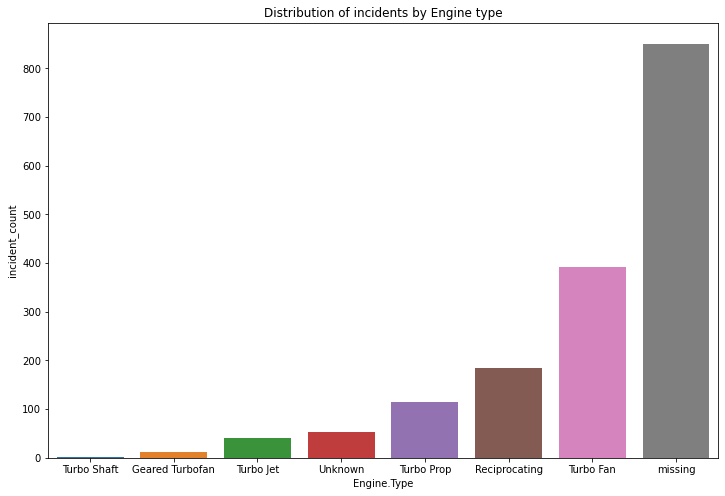

In [388]:
# plot the distribution of incidents by engine type
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data=engine_incident_count_df, x='Engine.Type', y='incident_count')
ax.set_title('Distribution of incidents by Engine type');

In [397]:
# Get electric Aircrafts
engine_type_lowest_risk_series = engine_incident_df[
    engine_incident_df['Engine.Type'] == 'Turbo Shaft'
]['Unique_name']

In [398]:
# Check how many in the series
len(engine_type_lowest_risk_series)

1

In [408]:
# Check Turbo Shaft
current_lowest_risk = set(engine_type_lowest_risk_series.values) & set(current_filtered_df.index)
len(current_lowest_risk)

set()

In [416]:
# check Geared Turbofan
engine_type_second_lowest_risk_series = engine_incident_df[
    engine_incident_df['Engine.Type'] == 'Geared Turbofan'
]['Unique_name']

current_lowest_risk = set(engine_type_second_lowest_risk_series.values) & set(current_filtered_df.index)
len(current_lowest_risk)

set()

In [418]:
# Check third_lowest risk engine type
engine_type_third_lowest_risk_series = engine_incident_df[
    engine_incident_df['Engine.Type'] == engine_incident_count_df.iloc[2]['Engine.Type']
]['Unique_name']

current_lowest_risk = set(engine_type_third_lowest_risk_series.values) & set(current_filtered_df.index)
len(current_lowest_risk)

2

In [419]:
print(f'Lowest Risk aircrafts are: {current_lowest_risk}')

Lowest Risk aircrafts are: {'Rockwell_NA-265-80', 'Boeing_B737-2H4'}
